In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/5g_hack/img1.jpg"
img = cv2.imread(image_path)

# Convert to HSV to detect specific colors easily
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define color ranges for blue and orange lines (tune these values as needed)
blue_lower = np.array([100, 50, 50])
blue_upper = np.array([130, 255, 255])
orange_lower = np.array([10, 100, 100])
orange_upper = np.array([25, 255, 255])

# Mask for blue lines
blue_mask = cv2.inRange(hsv, blue_lower, blue_upper)
# Mask for orange lines
orange_mask = cv2.inRange(hsv, orange_lower, orange_upper)

# Extract contours from blue lines
blue_contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Extract contours from orange lines
orange_contours, _ = cv2.findContours(orange_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Prepare time range based on the x-axis of the plot (assume it spans 12:00 to 09:00)
start_time = pd.to_datetime("12:00", format="%H:%M")
end_time = pd.to_datetime("23:00", format="%H:%M")

start_time=240
end_time=1381
time_range=np.arange(start_time,end_time,1)

# time_range = pd.date_range(start=start_time, end=end_time, freq='T')  # Minute frequency

print("start_time: ",start_time)
print("end_time: ",end_time)
print(time_range)
# Initialize dataset
data = []

# Function to map x-coordinate to time
def map_x_to_time(x, image_width):
    time_index = int(x / image_width * len(time_range))
    return time_range[time_index]

# Function to map y-coordinate to cell load
def map_y_to_cell_load(y, image_height):
    max_cell_load = 20  # Assuming the max cell load visible on y-axis is 20
    return max_cell_load * (1 - y / image_height)

# Process blue lines
for contour in blue_contours:
    for point in contour:
        x, y = point[0]
        #print("x: ",x,"y: ",y)
        time = map_x_to_time(x, img.shape[1])
        cell_load = map_y_to_cell_load(y, img.shape[0])
        data.append([time, "Coverage Cell", cell_load])

# Process orange lines
for contour in orange_contours:
    for point in contour:
        x, y = point[0]
        time = map_x_to_time(x, img.shape[1])
        cell_load = map_y_to_cell_load(y, img.shape[0])
        data.append([time, "Booster Cell", cell_load])



# Convert to DataFrame



# import cv2
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the image
# image_path = "/content/drive/MyDrive/5g_hack/img.jpg"
# img = cv2.imread(image_path)

# # Convert to HSV for better color filtering
# hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# # Define color ranges for blue and orange lines (adjust these values for accuracy)
# blue_lower = np.array([100, 50, 50])
# blue_upper = np.array([130, 255, 255])
# orange_lower = np.array([10, 100, 100])
# orange_upper = np.array([25, 255, 255])

# # Mask blue and orange lines
# blue_mask = cv2.inRange(hsv, blue_lower, blue_upper)
# orange_mask = cv2.inRange(hsv, orange_lower, orange_upper)

# # Extract contours from blue and orange lines
# blue_contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# orange_contours, _ = cv2.findContours(orange_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Prepare the time range for 5-minute intervals based on the x-axis (12:00 to 09:00)
# start_time = pd.to_datetime("12:00", format="%H:%M")
# end_time = pd.to_datetime("09:00", format="%H:%M") + pd.Timedelta(days=1)
# time_range = pd.date_range(start=start_time, end=end_time, freq='5T')  # 5-minute frequency

# # Initialize the dataset
# data = []

# # Function to map x-coordinate to time
# def map_x_to_time(x, image_width):
#     time_index = int(x / image_width * len(time_range))
#     return time_range[time_index] if 0 <= time_index < len(time_range) else None

# # Function to map y-coordinate to cell load
# def map_y_to_cell_load(y, image_height):
#     max_cell_load = 20  # Assuming max visible cell load on the y-axis is 20
#     return max_cell_load * (1 - y / image_height)

# # Extract data from blue lines
# for contour in blue_contours:
#     for point in contour:
#         x, y = point[0]
#         time = map_x_to_time(x, img.shape[1])
#         cell_load = map_y_to_cell_load(y, img.shape[0])
#         if time is not None:
#             data.append([time, "Coverage Cell", cell_load])

# # Extract data from orange lines
# for contour in orange_contours:
#     for point in contour:
#         x, y = point[0]
#         time = map_x_to_time(x, img.shape[1])
#         cell_load = map_y_to_cell_load(y, img.shape[0])
#         if time is not None:
#             data.append([time, "Booster Cell", cell_load])

# # Convert data to a DataFrame and drop duplicates to keep data every 5 minutes
# df = pd.DataFrame(data, columns=["time", "line color", "cell load"])
# df = df.drop_duplicates(subset=['time', 'line color'], keep='first')

# # Save the dataset
# df.to_csv("/content/drive/MyDrive/5g_hack/extracted_data_5min.csv", index=False)
# print("Data extraction complete. File saved as 'extracted_data_5min.csv'")

# # Plot extracted data to verify
# plt.figure(figsize=(14, 7))
# for line_color in df['line color'].unique():
#     subset = df[df['line color'] == line_color]
#     plt.plot(subset['time'], subset['cell load'], label=line_color)

# plt.xlabel('Time')
# plt.ylabel('Cell Load')
# plt.title('Extracted Data Verification Plot (5-Minute Interval)')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


start_time:  240
end_time:  1381
[ 240  241  242 ... 1378 1379 1380]


In [ ]:
image_path = "/content/drive/MyDrive/5g_hack/img2.jpg"
img = cv2.imread(image_path)

# Convert to HSV to detect specific colors easily
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define color ranges for blue and orange lines (tune these values as needed)
blue_lower = np.array([100, 50, 50])
blue_upper = np.array([130, 255, 255])
orange_lower = np.array([10, 100, 100])
orange_upper = np.array([25, 255, 255])

# Mask for blue lines
blue_mask = cv2.inRange(hsv, blue_lower, blue_upper)
# Mask for orange lines
orange_mask = cv2.inRange(hsv, orange_lower, orange_upper)

# Extract contours from blue lines
blue_contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Extract contours from orange lines
orange_contours, _ = cv2.findContours(orange_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Prepare time range based on the x-axis of the plot (assume it spans 12:00 to 09:00)
start_time = pd.to_datetime("00:00", format="%H:%M")
end_time = pd.to_datetime("09:00", format="%H:%M")

start_time=0
end_time=541
time_range=np.arange(start_time,end_time,1)

# time_range = pd.date_range(start=start_time, end=end_time, freq='T')  # Minute frequency

print("start_time: ",start_time)
print("end_time: ",end_time)
print(time_range)
# Initialize dataset
# data = []

# Function to map x-coordinate to time
def map_x_to_time(x, image_width):
    time_index = int(x / image_width * len(time_range))
    return time_range[time_index]

# Function to map y-coordinate to cell load
def map_y_to_cell_load(y, image_height):
    max_cell_load = 20  # Assuming the max cell load visible on y-axis is 20
    return max_cell_load * (1 - y / image_height)

# Process blue lines
for contour in blue_contours:
    for point in contour:
        x, y = point[0]
        #print("x: ",x,"y: ",y)
        time = map_x_to_time(x, img.shape[1])
        cell_load = map_y_to_cell_load(y, img.shape[0])
        data.append([time, "Coverage Cell", cell_load])

# Process orange lines
for contour in orange_contours:
    for point in contour:
        x, y = point[0]
        time = map_x_to_time(x, img.shape[1])
        cell_load = map_y_to_cell_load(y, img.shape[0])
        data.append([time, "Booster Cell", cell_load])
df = pd.DataFrame(data, columns=["time", "line color", "cell load"])

# Save to CSV
df.to_csv("/content/drive/MyDrive/5g_hack/extracted_data.csv", index=False)
print("Data extraction complete. File saved as 'extracted_data.csv'")

start_time:  0
end_time:  541
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 

In [ ]:
df.head(5)

,time,line color,cell load
0,1900-01-02 04:06:00,Coverage Cell,2.829268
1,1900-01-02 04:20:00,Coverage Cell,2.829268
2,1900-01-02 04:21:00,Coverage Cell,2.796748
3,1900-01-02 04:38:00,Coverage Cell,2.796748
4,1900-01-02 04:39:00,Coverage Cell,2.829268


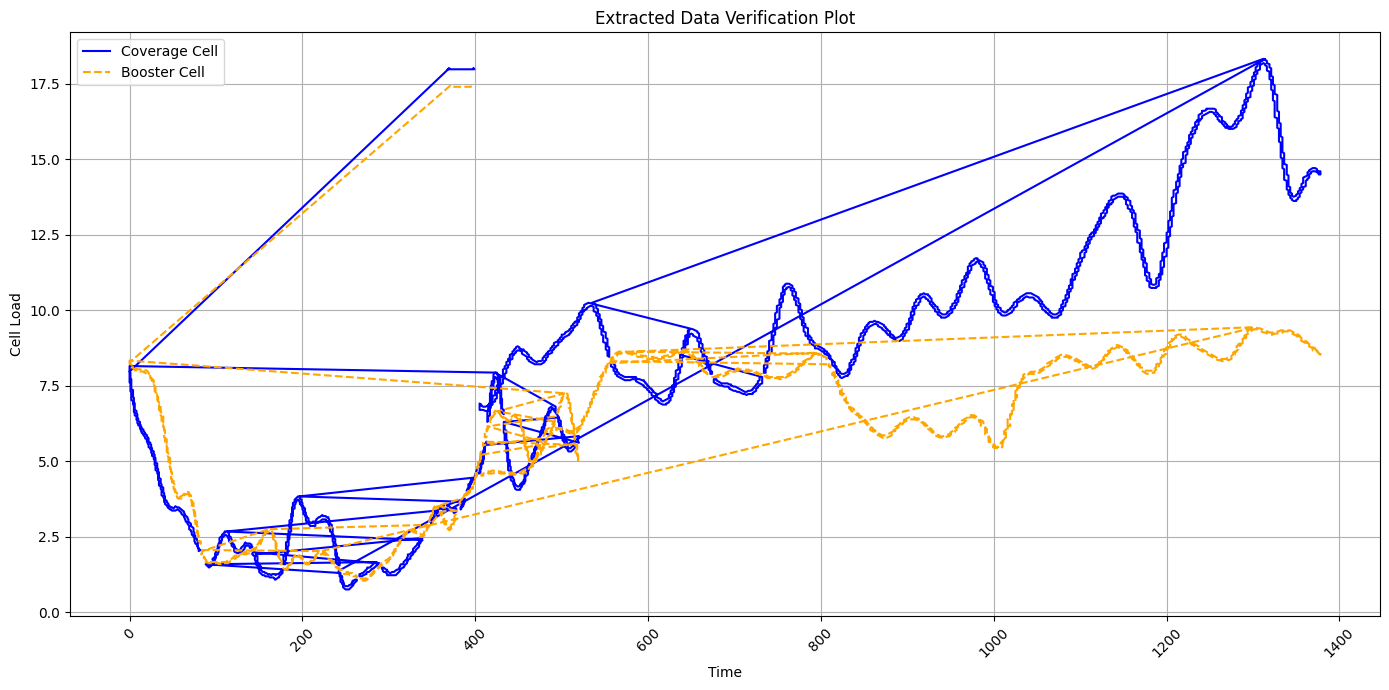

In [ ]:
data_path = "/content/drive/MyDrive/5g_hack/extracted_data.csv"
df = pd.read_csv(data_path)

# Convert time column to datetime format
# df['time'] = pd.to_datetime(df['time'])

# Separate data based on line color
coverage_data = df[df['line color'] == 'Coverage Cell']
booster_data = df[df['line color'] == 'Booster Cell']
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(coverage_data['time'], coverage_data['cell load'], color='blue', label='Coverage Cell', linestyle='-')
plt.plot(booster_data['time'], booster_data['cell load'], color='orange', label='Booster Cell', linestyle='--')

# Formatting the plot
plt.xlabel('Time')
plt.ylabel('Cell Load')
plt.title('Extracted Data Verification Plot')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the extracted data as a template (update path as needed)
data_path = "/content/drive/MyDrive/5g_hack/extracted_data.csv"
df = pd.read_csv(data_path)

# Initialize lists to store the new data
synthetic_data = []

# Define the number of coverage and booster cells
num_coverage_cells = 56
num_booster_cells = 56

# Function to introduce variations in cell load
def add_variation(load, scale=0.2):
    return load + np.random.normal(0, scale)  # Add a small normal random variation

# Generate synthetic data for coverage cells
for i in range(num_coverage_cells):
    cell_id = f"Coverage_{i+1}"
    for _, row in df[df['line color'] == 'Coverage Cell'].iterrows():
        # Add variation to the load value
        new_load = add_variation(row['cell load'])
        synthetic_data.append([row['time'], cell_id, 'Coverage Cell', max(0, new_load)])  # Ensure load is non-negative

# Generate synthetic data for booster cells
for i in range(num_booster_cells):
    cell_id = f"Booster_{i+1}"
    for _, row in df[df['line color'] == 'Booster Cell'].iterrows():
        # Add variation to the load value
        new_load = add_variation(row['cell load'])
        synthetic_data.append([row['time'], cell_id, 'Booster Cell', max(0, new_load)])  # Ensure load is non-negative

# Create a DataFrame from the synthetic data
synthetic_df = pd.DataFrame(synthetic_data, columns=['Time', 'cell_id', 'cell_type', 'load'])

# Save the synthetic dataset to a CSV file
output_path = "/content/drive/MyDrive/5g_hack/synthetic_dataset_56_cells.csv"
synthetic_df.to_csv(output_path, index=False)
print(f"Synthetic data generated and saved to {output_path}")

Synthetic data generated and saved to /content/drive/MyDrive/5g_hack/synthetic_dataset_56_cells.csv


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/5g_hack/synthetic_dataset_56_cells.csv', header=None, names=['Time', 'cell_id', 'cell_type', 'load'])
# Convert Time column to datetime and extract time only, skipping the date
df['Time']

<ipython-input-15-94cdba222d87>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/5g_hack/synthetic_dataset_56_cells.csv', header=None, names=['Time', 'cell_id', 'cell_type', 'load'])


IndexError: list index out of range

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/5g_hack/synthetic_dataset_56_cells.csv', header=None, names=['Time', 'cell_id', 'cell_type', 'load'])

# Convert Time column to datetime and extract time only, skipping the date
df['Time'] = df[:,'Time'].split(" ")[1]

# Plotting
plt.figure(figsize=(14, 7))

# Get unique cell IDs
cell_ids = df['cell_id'].unique()

# Plot each cell ID separately
for cell_id in cell_ids:
    cell_data = df[df['cell_id'] == cell_id]
    color = 'blue' if cell_data['cell_type'].iloc[0] == 'Coverage Cell' else 'orange'
    plt.plot(cell_data['Time'], cell_data['load'], color=color, label=cell_id if color == 'blue' else '_nolegend_')

# Add labels, legend, and grid
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Load over Time for Each Cell')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()